# Bubble Sort
## Sort function

In [1]:
import numpy as np
import math
import time
import itertools
import matplotlib.pyplot as plt

In [2]:
def b_sort(A,aLen):
    for i in range(0,aLen):
        swapped = False
        for j in range(1,aLen-i):
            if(A[j-1]>A[j]):
                A[j-1],A[j] = A[j],A[j-1] #Swap
                swapped = True
        if(not swapped):break
    return A

#Modified version, returns steps and comparisons
def b_sort_Mod(A,aLen):
    #init counters
    steps,comps,swaps = 0,0,0
    t=np.zeros(aLen,dtype=int)
    
    i = 0;steps+=1
    while(i<aLen):
        j=1
        swapped = False
        while(j<aLen-i):
            comps+=1
            if(A[j-1]>A[j]):
                A[j-1],A[j] = A[j],A[j-1] #Swap
                t[j]+=1
                swapped = True
                swaps+=1
                steps+=4 #actually swap requires 3 steps
            j+=1
            steps+=3
        steps+=3
        if(not swapped):break
        i+=1
        steps+=2
        
    return A,steps,comps,swaps,t

Here we test the function:

In [3]:
A = np.array([0,5,1,3,4,7,9])
print('A > ',A)
print('ordered A > ',b_sort(A,len(A)))

A >  [0 5 1 3 4 7 9]
ordered A >  [0 1 3 4 5 7 9]


###### Custom permutations class:

In [4]:
class MyPerm:
    def __init__(self,n):
        self.n_perm = 0
        self.pasos = []
        self.comparaciones = []
        self.sw = []
        self.t_loop = []
        
        self.used = [0]*100 #max, 100 numbers, it wont reach here, so, dont worry :v
        self.curPos=0
        self.perm=[]
    def aux_permutations(self,n):
        if(self.curPos==n):
            self.n_perm+=1
            A,steps,comps,swaps,t = b_sort_Mod(self.perm,n)
            self.pasos.append(steps)
            self.comparaciones.append(comps)
            self.sw.append(swaps)
            self.sw.append(t)
            return
        self.curPos+=1        
        for i in range(n):
            if(self.used[i]==1): continue
            self.used[i]=1;self.perm.append(i);
            self.aux_permutations(n)
            self.used[i]=0;self.perm.pop()
        self.curPos-=1
    
    def permutations (self,n):
        self.__init__(n)
        self.aux_permutations(n)
        return pasos,comparaciones,sw,t_loop,n_perm

### Steps distribution

In [5]:
#custom function - calc steps
# gets n if it only requires a permutation, and m if requires random permutations
def calc(which,**kwargs):
    n = kwargs.get('n',None)
    m = kwargs.get('m',None)
    #Generate permutations lenght n
    perm = [] #Note, in the case of the custom permutations, we do not store them
    n_perm = 0
    if(which==0):  #itertools
        perm = np.array(list(itertools.permutations(range(n))))
        n_perm = len(perm)
    elif(which==1): #recursive function, custom
        e = MyPerm(n)
        pasos,comparaciones,sw,t_loop,n_perm = e.permutations(n)
        return pasos,comparaciones,sw,t_loop,perm,n_perm
    else: #random in a range
        perm = np.array([np.random.permutation(n) for i in range(m)])
        n_perm=m
    pasos = np.empty(n_perm)
    comparaciones = np.empty(n_perm)
    sw = np.empty(n_perm)
    t_loop=np.empty([n_perm,n])
    for i in range (n_perm):
        tm = np.copy(perm[i])
        A,steps,comps,swaps,t = b_sort_Mod(tm,n)
        pasos[i]=steps
        comparaciones[i]=comps
        sw[i]=swaps
        t_loop[i] = t
    return pasos,comparaciones,sw,t_loop,perm,n_perm

### Histogram Functions:

In [6]:
def step_hist(pasos,n_perm,n):
    min_steps,max_steps=min(pasos), max(pasos)
    plt.hist(pasos, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density Steps - n = "+str(n))
    plt.xlabel('Steps')
    plt.ylabel('Probaility')
    plt.show()

    #raw data
    vals,counts = np.unique(pasos,return_counts=True)
    print("\nAverage Steps: "+str(np.average(pasos)), "- Min Steps: "+str(min_steps),"- Max Steps: "+str(max_steps))
    print("Probabilities: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))
def comp_hist(comparaciones,n_perm,n):
    #histogram comparisons
    min_steps,max_steps=min(comparaciones), max(comparaciones)
    plt.hist(comparaciones, normed=1)
    plt.title("Probability Density Comparisons - n = "+str(n))
    plt.xlabel('n-comparisons')
    plt.ylabel('Probaility')
    plt.show()

    #raw data
    vals,counts = np.unique(comparaciones,return_counts=True)
    print("\nAverage Comparisons: "+str(np.average(comparaciones))
          , "- Min Comparisons: "+str(min_steps),"- Max Comparisons: "+str(max_steps))
    print("Probabilities for Comparisons: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))
def swap_hist(sw,n_perm,n):
    #histogram swaps
    min_steps,max_steps=min(sw), max(sw)
    plt.hist(sw,normed=1)
    plt.title("Probability Density Swaps - n = "+str(n))
    plt.xlabel('n-swaps')
    plt.ylabel('Probaility')
    plt.show()
    #raw data
    vals,counts = np.unique(sw,return_counts=True)
    print("\nAverage Swaps: "+str(np.average(sw)), "- Min Swaps: "+str(min_steps),"- Max Swaps: "+str(max_steps))
    print("Probabilities for Swaps: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))

Now we execute them:

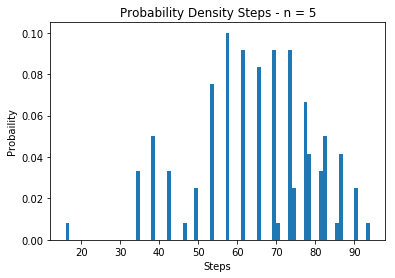


Average Steps: 64.8166666667 - Min Steps: 16.0 - Max Steps: 94.0
Probabilities: 
P(16) = 0.00833333333333
P(34) = 0.0333333333333
P(38) = 0.05
P(42) = 0.0333333333333
P(46) = 0.00833333333333
P(49) = 0.025
P(53) = 0.075
P(57) = 0.1
P(61) = 0.0916666666667
P(65) = 0.0833333333333
P(69) = 0.0916666666667
P(70) = 0.00833333333333
P(73) = 0.0916666666667
P(74) = 0.025
P(77) = 0.0666666666667
P(78) = 0.0416666666667
P(81) = 0.0333333333333
P(82) = 0.05
P(85) = 0.00833333333333
P(86) = 0.0416666666667
P(90) = 0.025
P(94) = 0.00833333333333


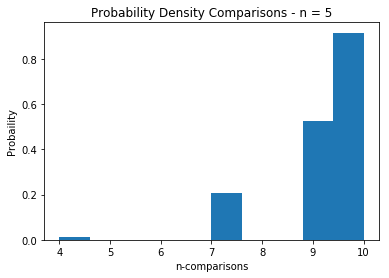


Average Comparisons: 9.25833333333 - Min Comparisons: 4.0 - Max Comparisons: 10.0
Probabilities for Comparisons: 
P(4) = 0.00833333333333
P(7) = 0.125
P(9) = 0.316666666667
P(10) = 0.55


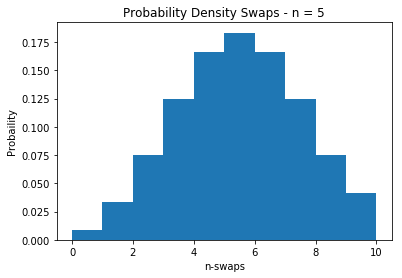


Average Swaps: 5.0 - Min Swaps: 0.0 - Max Swaps: 10.0
Probabilities for Swaps: 
P(0) = 0.00833333333333
P(1) = 0.0333333333333
P(2) = 0.075
P(3) = 0.125
P(4) = 0.166666666667
P(5) = 0.183333333333
P(6) = 0.166666666667
P(7) = 0.125
P(8) = 0.075
P(9) = 0.0333333333333
P(10) = 0.00833333333333


In [7]:
qt = 5 #permutations
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(0,n=qt)
step_hist(pasos,n_perm,qt)
comp_hist(comparaciones,n_perm,qt)
swap_hist(sw,n_perm,qt)

And for the number of comparisons performed by each number(Note that each value corresponds to [t0 t1 t2 .... tn]):

In [8]:
t_norm = np.empty(n_perm)
for i in range(n_perm):
    print ("Permutation "+ str(perm[i]) +" -> ",t_loop[i])

Permutation [0 1 2 3 4] ->  [ 0.  0.  0.  0.  0.]
Permutation [0 1 2 4 3] ->  [ 0.  0.  0.  0.  1.]
Permutation [0 1 3 2 4] ->  [ 0.  0.  0.  1.  0.]
Permutation [0 1 3 4 2] ->  [ 0.  0.  0.  1.  1.]
Permutation [0 1 4 2 3] ->  [ 0.  0.  0.  1.  1.]
Permutation [0 1 4 3 2] ->  [ 0.  0.  0.  2.  1.]
Permutation [0 2 1 3 4] ->  [ 0.  0.  1.  0.  0.]
Permutation [0 2 1 4 3] ->  [ 0.  0.  1.  0.  1.]
Permutation [0 2 3 1 4] ->  [ 0.  0.  1.  1.  0.]
Permutation [0 2 3 4 1] ->  [ 0.  0.  1.  1.  1.]
Permutation [0 2 4 1 3] ->  [ 0.  0.  1.  1.  1.]
Permutation [0 2 4 3 1] ->  [ 0.  0.  1.  2.  1.]
Permutation [0 3 1 2 4] ->  [ 0.  0.  1.  1.  0.]
Permutation [0 3 1 4 2] ->  [ 0.  0.  1.  1.  1.]
Permutation [0 3 2 1 4] ->  [ 0.  0.  2.  1.  0.]
Permutation [0 3 2 4 1] ->  [ 0.  0.  2.  1.  1.]
Permutation [0 3 4 1 2] ->  [ 0.  0.  1.  2.  1.]
Permutation [0 3 4 2 1] ->  [ 0.  0.  2.  2.  1.]
Permutation [0 4 1 2 3] ->  [ 0.  0.  1.  1.  1.]
Permutation [0 4 1 3 2] ->  [ 0.  0.  1.  2.  1.]


## Samples

### Recursive Permutation Function - No itertools

Using calc(1,n=qt)

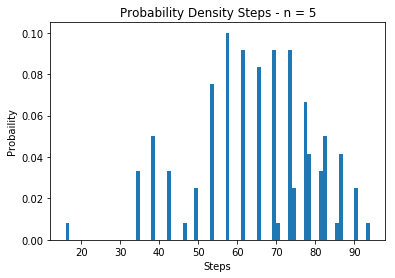


Average Steps: 64.8166666667 - Min Steps: 16.0 - Max Steps: 94.0
Probabilities: 
P(16) = 0.00833333333333
P(34) = 0.0333333333333
P(38) = 0.05
P(42) = 0.0333333333333
P(46) = 0.00833333333333
P(49) = 0.025
P(53) = 0.075
P(57) = 0.1
P(61) = 0.0916666666667
P(65) = 0.0833333333333
P(69) = 0.0916666666667
P(70) = 0.00833333333333
P(73) = 0.0916666666667
P(74) = 0.025
P(77) = 0.0666666666667
P(78) = 0.0416666666667
P(81) = 0.0333333333333
P(82) = 0.05
P(85) = 0.00833333333333
P(86) = 0.0416666666667
P(90) = 0.025
P(94) = 0.00833333333333


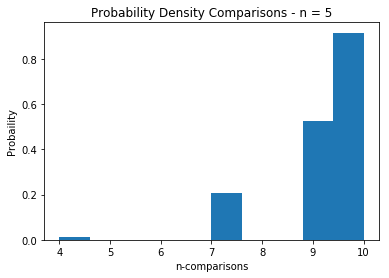


Average Comparisons: 9.25833333333 - Min Comparisons: 4.0 - Max Comparisons: 10.0
Probabilities for Comparisons: 
P(4) = 0.00833333333333
P(7) = 0.125
P(9) = 0.316666666667
P(10) = 0.55


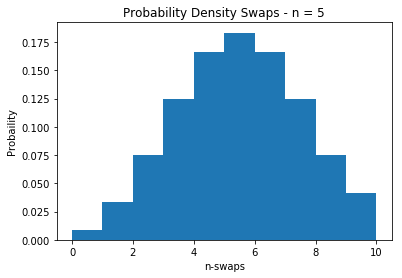


Average Swaps: 5.0 - Min Swaps: 0.0 - Max Swaps: 10.0
Probabilities for Swaps: 
P(0) = 0.00833333333333
P(1) = 0.0333333333333
P(2) = 0.075
P(3) = 0.125
P(4) = 0.166666666667
P(5) = 0.183333333333
P(6) = 0.166666666667
P(7) = 0.125
P(8) = 0.075
P(9) = 0.0333333333333
P(10) = 0.00833333333333


In [9]:
#Call the function
qt=5
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(1,n=qt)
step_hist(pasos,n_perm,qt)
comp_hist(comparaciones,n_perm,qt)
swap_hist(sw,n_perm,qt)

### Random Permutations

Here we test the same, but instead of using all permutations, we decide to take $m$ random permutations of $n$ numbers

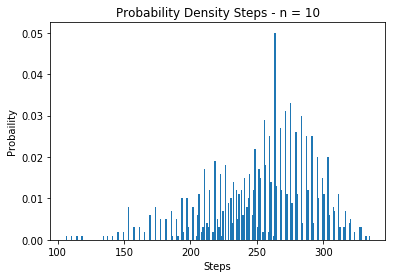


Average Steps: 252.909 - Min Steps: 106.0 - Max Steps: 335.0
Probabilities: 
P(106) = 0.001
P(110) = 0.001
P(114) = 0.001
P(118) = 0.001
P(134) = 0.001
P(137) = 0.001
P(141) = 0.001
P(145) = 0.002
P(149) = 0.002
P(153) = 0.008
P(157) = 0.003
P(161) = 0.003
P(165) = 0.002
P(169) = 0.006
P(173) = 0.008
P(177) = 0.005
P(181) = 0.005
P(185) = 0.007
P(186) = 0.001
P(189) = 0.005
P(190) = 0.001
P(193) = 0.01
P(194) = 0.002
P(197) = 0.01
P(198) = 0.003
P(201) = 0.008
P(202) = 0.008
P(204) = 0.001
P(205) = 0.006
P(206) = 0.011
P(208) = 0.002
P(209) = 0.003
P(210) = 0.017
P(212) = 0.004
P(213) = 0.003
P(214) = 0.012
P(216) = 0.002
P(217) = 0.002
P(218) = 0.019
P(220) = 0.005
P(221) = 0.003
P(222) = 0.016
P(223) = 0.001
P(224) = 0.007
P(226) = 0.018
P(228) = 0.009
P(230) = 0.01
P(231) = 0.004
P(232) = 0.014
P(234) = 0.012
P(235) = 0.005
P(236) = 0.011
P(238) = 0.012
P(239) = 0.006
P(240) = 0.015
P(242) = 0.008
P(243) = 0.01
P(244) = 0.016
P(246) = 0.006
P(247) = 0.012
P(248) = 0.022
P(250) = 0.

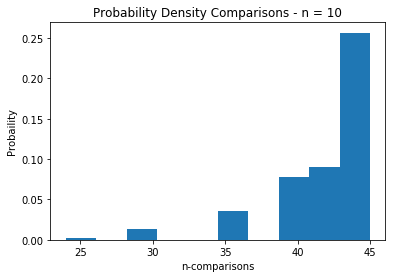


Average Comparisons: 41.927 - Min Comparisons: 24.0 - Max Comparisons: 45.0
Probabilities for Comparisons: 
P(24) = 0.005
P(30) = 0.029
P(35) = 0.074
P(39) = 0.164
P(42) = 0.189
P(44) = 0.242
P(45) = 0.297


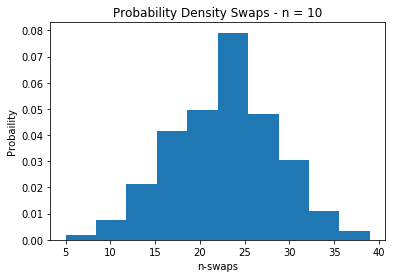


Average Swaps: 22.642 - Min Swaps: 5.0 - Max Swaps: 39.0
Probabilities for Swaps: 
P(5) = 0.001
P(6) = 0.001
P(7) = 0.002
P(8) = 0.002
P(9) = 0.004
P(10) = 0.004
P(11) = 0.018
P(12) = 0.01
P(13) = 0.015
P(14) = 0.017
P(15) = 0.031
P(16) = 0.042
P(17) = 0.042
P(18) = 0.057
P(19) = 0.05
P(20) = 0.056
P(21) = 0.062
P(22) = 0.073
P(23) = 0.084
P(24) = 0.058
P(25) = 0.054
P(26) = 0.066
P(27) = 0.052
P(28) = 0.045
P(29) = 0.034
P(30) = 0.025
P(31) = 0.028
P(32) = 0.017
P(33) = 0.023
P(34) = 0.009
P(35) = 0.006
P(36) = 0.005
P(37) = 0.005
P(38) = 0.001
P(39) = 0.001


In [10]:
#Call the function
qt,rand_amount = 10,1000
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(2,n=qt,m=rand_amount)

step_hist(pasos,n_perm,qt)
comp_hist(comparaciones,n_perm,qt)
swap_hist(sw,n_perm,qt)